### [이모티콘 할인행사](https://school.programmers.co.kr/learn/courses/30/lessons/150368)

- discount 경우의 수(10, 20, 30, 40)가 적기 때문에, 모든 경우의 수를 따져볼만함   
  (4^m 정도의 복잡도밖에 되지 않기 때문에)

In [1]:
from itertools import product

def solution(users, emoticons):
    discounts = [10, 20, 30, 40] # 모든 할인율의 경우의 수
    discount_cases = list(product(discounts, repeat=len(emoticons)))
    
    max_subscriber = 0
    max_sales = 0
    
    emoticons = [int(x*0.01) for x in emoticons] # 이후에 할인율을 곱하는 과정에서 100으로 나누는 것을 사전에 처리
    
    for case in discount_cases:
        subscriber = 0
        sales = 0
        
        for user in users:
            user_discount_threshold, user_price_threshold = user
            
            # 할인율 조합에 대한 소비금액 - 원하는 할인율 이상인 것들만
            spend = sum([(100-x)*y for x, y in zip(case, emoticons) if x >= user_discount_threshold])
            
            # 소비금액이 기준 이상이면 구독
            if spend >= user_price_threshold:
                subscriber += 1
            else :
                sales += spend

        # 최대값 업데이트
        if subscriber > max_subscriber:
            max_subscriber = subscriber
            max_sales = sales
        elif subscriber == max_subscriber and sales > max_sales:
            max_sales = sales
        
    return [max_subscriber, max_sales]

In [2]:
discount = (1,2,3,4)
price = [5,6,7,8]

[x*y for x, y in zip(discount, price)]

[5, 12, 21, 32]

In [3]:
users = [[40, 10000], [25, 10000]]
emoticons = [7000, 9000]
solution(users, emoticons)

[1, 5400]

### [혼자서 하는 틱택토](https://school.programmers.co.kr/learn/courses/30/lessons/160585)

- 오류가 발생하는 경우의 수를 사전에 정리해두고, 이에 부합하는 코드를 작성
- 아래 코드를 적용했을 경우, 약 다섯 개의 케이스에서 정답이 틀림 -> 빼먹은 케이스 확인

In [1]:
def solution(board):
    # case 1 : X가 O보다 많은 경우
    o_count = sum([x.count('O') for x in board])
    x_count = sum([x.count('X') for x in board])
    if x_count > o_count:
        return 0
    
    # case 2 : 이미 한쪽이 승리한 상황에서, 게임이 지속된 경우
    def is_win(board, target):
        all_idx = [(x, y) for x, row in enumerate(board) for y, char in enumerate(row) if char == target]
        if len(all_idx) < 3:
            return False
        
        win_patterns = [[(0,0), (0,1), (0,2)],
                        [(1,0), (1,1), (1,2)],
                        [(2,0), (2,1), (2,2)],
                        [(0,0), (1,0), (2,0)],
                        [(0,1), (1,1), (2,1)],
                        [(0,2), (1,2), (2,2)],
                        [(0,0), (1,1), (2,2)],
                        [(2,0), (1,1), (0,2)]]
        
        if any([True for pattern in win_patterns if all([p in all_idx for p in pattern])]):
            return True
        
        return False
        
    ## X가 승리했는데, O가 X보다 많음
    x_win = is_win(board, target='X')
    if x_win and o_count > x_count:
        return 0
    
    ## O가 승리했는데, X가 O와 숫자가 같음
    o_win = is_win(board, target='O')
    if o_win and x_count == o_count:
        return 0
    
    return 1

In [2]:
all_idx=[(0, 2), (2, 2), (1,2)]
win_patterns = [[(0,0), (0,1), (0,2)],
                [(1,0), (1,1), (1,2)],
                [(2,0), (2,1), (2,2)],
                [(0,0), (1,0), (2,0)],
                [(0,1), (1,1), (2,1)],
                [(0,2), (1,2), (2,2)],
                [(0,0), (1,1), (2,2)],
                [(2,0), (1,1), (0,2)]]

In [3]:
any([True for pattern in win_patterns if all([p in all_idx for p in pattern])])

True

In [4]:
a = [(1,0), (1,1), (0,1)]
b = [(1,0), (0,1)]
all([x for x in b if x in a])

True

In [5]:
board = ["O.X", ".O.", "..X"]
solution(board)

1

- 빼먹은 케이스 : 'O'가 'X'보다 두 개 이상 많은 경우
- 이를 적용해 코드 일부 업데이트

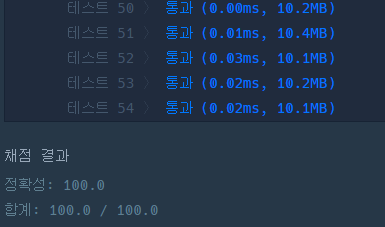

In [ ]:
def solution(board):
    # case 1 : X가 O보다 많은 경우
    o_count = sum([x.count('O') for x in board])
    x_count = sum([x.count('X') for x in board])
    if x_count > o_count or o_count > x_count+1: ### 빼먹은 케이스 고려
        return 0
    
    # case 2 : 이미 한쪽이 승리한 상황에서, 게임이 지속된 경우
    def is_win(board, target):
        all_idx = [(x, y) for x, row in enumerate(board) for y, char in enumerate(row) if char == target]
        if len(all_idx) < 3:
            return False
        
        win_patterns = [[(0,0), (0,1), (0,2)],
                        [(1,0), (1,1), (1,2)],
                        [(2,0), (2,1), (2,2)],
                        [(0,0), (1,0), (2,0)],
                        [(0,1), (1,1), (2,1)],
                        [(0,2), (1,2), (2,2)],
                        [(0,0), (1,1), (2,2)],
                        [(2,0), (1,1), (0,2)]]
        
        if any([True for pattern in win_patterns if all([p in all_idx for p in pattern])]):
            return True
        
        return False
        
    ## X가 승리했는데, O가 X보다 많음
    x_win = is_win(board, target='X')
    if x_win and o_count > x_count:
        return 0
    
    ## O가 승리했는데, X가 O와 숫자가 같음
    o_win = is_win(board, target='O')
    if o_win and x_count == o_count:
        return 0
    
    return 1